In [27]:
'''
0、id、int行の通し番号
1、age、int、年齢
2、job、varchar、職種
3、marital、varchar、未婚/既婚
4、education、varchar、教育水準
5、default、varchar、債務不履行があるか（yes, no）
6、balance、int、年間平均残高（€）
7、housing、varchar、住宅ローン（yes, no）
8、loan、varchar、個人ローン（yes, no）
9、contact、varchar、連絡方法
10、dayint、最終接触日
11、monthchar、最終接触月
12、duration、int、最終接触時間（秒）
13、compaign、int、現キャンペーンにおける接触回数
14、pdaysint、経過日数：前キャンペーン接触後の日数
15、previous、int、接触実績：現キャンペーン以前までに顧客に接触した回数
16、poutcome、varchar、前回のキャンペーンの成果
17、y、boolean、定額預金申し込み有無（1:有り, 0:無し）
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/submit_sample.csv", header=None)

In [29]:
train.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1


In [30]:
print(train.shape)
print(test.shape)
print(sample.shape)

(27128, 18)
(18083, 17)
(18083, 2)


In [31]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [32]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [34]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [35]:
trainX = train.iloc[:, 1:17]
trainy = train["y"]

In [36]:
trainX.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure


In [37]:
testX = test.copy()

In [38]:
testX = testX.iloc[:, 1:17]

In [39]:
trainX = pd.get_dummies(trainX, drop_first=True)
testX = pd.get_dummies(testX, drop_first=True)

In [40]:
model = RandomForestClassifier(n_estimators=200, random_state=0)

In [41]:
model.fit(trainX, trainy)

RandomForestClassifier(n_estimators=200, random_state=0)

In [42]:
pred = model.predict_proba(testX)

In [43]:
pred

array([[0.45 , 0.55 ],
       [0.4  , 0.6  ],
       [0.99 , 0.01 ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.995, 0.005]])

In [46]:
pred = pred[:, 1]

In [47]:
sample[1] = pred

In [49]:
sample.to_csv("forest1_bank.csv", index=None, header=None)

In [51]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)

In [52]:
model2.fit(trainX, trainy)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [54]:
pred2 = model2.predict_proba(testX)

In [55]:
pred2

array([[0.49823788, 0.50176212],
       [0.52900699, 0.47099301],
       [0.97697467, 0.02302533],
       ...,
       [0.98456992, 0.01543008],
       [0.97214615, 0.02785385],
       [0.96317862, 0.03682138]])

In [56]:
pred2 = pred2[:, 1]

In [57]:
sample[1] = pred2

In [58]:
sample.to_csv("forest2_bank.csv", index=None, header=None)

In [60]:
model3 = RandomForestClassifier(n_estimators=300, random_state=0)

In [61]:
model3.fit(trainX, trainy)

RandomForestClassifier(n_estimators=300, random_state=0)

In [62]:
pred3 = model3.predict_proba(testX)

In [63]:
pred3

array([[0.46      , 0.54      ],
       [0.39666667, 0.60333333],
       [0.99333333, 0.00666667],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99666667, 0.00333333]])

In [64]:
pred3 = pred3[:, 1]

In [65]:
sample[1] = pred3

In [66]:
sample.to_csv("forest3_bank.csv", index=None, header=None)

In [87]:
model4 = RandomForestClassifier()

In [88]:
parameters={"n_estimators":list(range(100, 401, 50))}

In [89]:
gcv = GridSearchCV(model4, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             return_train_score=True, scoring='roc_auc')

In [90]:
gcv.cv_results_

{'mean_fit_time': array([ 3.79378462,  5.6587728 ,  7.90883656, 10.2471478 , 12.21184525,
        13.75139146, 12.74301772]),
 'std_fit_time': array([0.02605117, 0.16797186, 0.10073799, 0.10249265, 0.20202549,
        0.07319752, 1.89737298]),
 'mean_score_time': array([0.17231059, 0.2782433 , 0.36408243, 0.46931849, 0.54893117,
        0.61834044, 0.45348544]),
 'std_score_time': array([0.00450526, 0.00435867, 0.0126649 , 0.02531872, 0.0124115 ,
        0.02959822, 0.08048397]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300, 350, 400],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300},
  {'n_estimators': 350},
  {'n_estimators': 400}],
 'split0_test_score': array([0.92545652, 0.92540574, 0.92543401, 0.92624491, 0.92630293,
        0.92625658, 0.92674486]),
 'spli

In [91]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [92]:
train_score

array([1., 1., 1., 1., 1., 1., 1.])

In [93]:
test_score

array([0.92455641, 0.92678984, 0.92623111, 0.92729026, 0.92750196,
       0.92799108, 0.92786806])

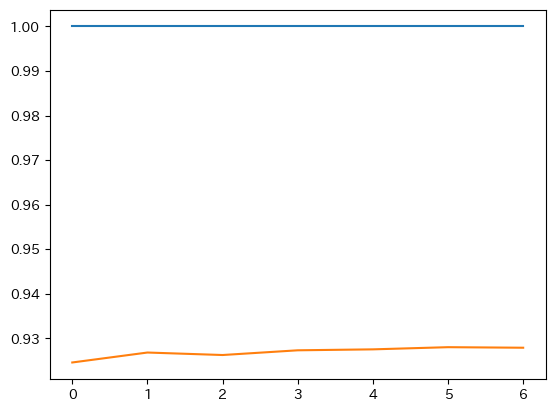

In [94]:
plt.plot(train_score)
plt.plot(test_score)
#plt.xticks([0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9,10])
plt.show()

In [95]:
gcv.best_params_

{'n_estimators': 350}

In [96]:
pred = gcv.predict_proba(testX)

In [97]:
pred

array([[0.42      , 0.58      ],
       [0.36285714, 0.63714286],
       [0.99142857, 0.00857143],
       ...,
       [1.        , 0.        ],
       [0.99714286, 0.00285714],
       [1.        , 0.        ]])

In [98]:
pred = pred[:, 1]

In [99]:
sample[1] = pred

In [100]:
sample.to_csv("forest4_bank.csv", index=None, header=None)

In [101]:
parameters2={"n_estimators":list(range(100, 401, 50)),
             "max_depth":list(range(1, 11))}

In [103]:
gcv = GridSearchCV(model4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             return_train_score=True, scoring='roc_auc')

In [104]:
gcv.cv_results_

{'mean_fit_time': array([0.6597055 , 0.92057776, 1.30403938, 1.79081221, 2.04569545,
        2.68591595, 3.51729603, 1.19363661, 1.49183044, 1.8756186 ,
        2.60066237, 3.45371261, 3.88361416, 4.63101001, 1.54710355,
        2.21837139, 2.50398455, 2.78420205, 3.69250979, 4.3188951 ,
        4.66674662, 1.32833877, 1.90106287, 2.67258139, 3.41359525,
        4.61989923, 5.16715441, 5.76018476, 1.55858502, 2.46001992,
        3.29165378, 4.01424212, 4.49675469, 5.11378551, 5.80341759,
        1.65734558, 2.59197392, 3.84850478, 4.51801   , 5.25767679,
        6.50220208, 7.58778157, 1.93861508, 2.62672987, 3.88836141,
        4.60268559, 5.24324999, 6.11989913, 6.91315117, 1.91684155,
        2.88408937, 3.83079395, 4.75446434, 5.75354724, 6.61707778,
        7.51206946, 2.05655923, 3.14156566, 4.160079  , 5.21177392,
        6.17905769, 7.22763319, 8.33583121, 2.31842957, 3.76630902,
        4.4513061 , 5.6383008 , 6.81863127, 7.83690195, 7.8416544 ]),
 'std_fit_time': array([0.009

In [105]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [106]:
train_score

array([0.84721671, 0.86002974, 0.86497865, 0.86302814, 0.8554129 ,
       0.86079827, 0.86225052, 0.87821343, 0.87628473, 0.87785404,
       0.87789583, 0.87762506, 0.87769603, 0.87780256, 0.88539705,
       0.8877889 , 0.88898622, 0.88768786, 0.88784848, 0.88725738,
       0.88777956, 0.8987955 , 0.89946342, 0.89761563, 0.89870301,
       0.89826152, 0.89840046, 0.8986075 , 0.90693773, 0.90718087,
       0.90884096, 0.90879417, 0.90913344, 0.90876354, 0.90823695,
       0.91692078, 0.91700978, 0.91707344, 0.91772184, 0.9171496 ,
       0.91724005, 0.91769094, 0.92505974, 0.92634808, 0.92520536,
       0.92599661, 0.92601867, 0.92626154, 0.92651366, 0.93389727,
       0.93451751, 0.93489675, 0.9350689 , 0.93523224, 0.93492902,
       0.93519731, 0.94235173, 0.94290212, 0.94348022, 0.94336629,
       0.9435366 , 0.94354118, 0.94395253, 0.95153837, 0.95226874,
       0.95223701, 0.95257147, 0.95276945, 0.95226832, 0.9525818 ])

In [107]:
test_score

array([0.84515188, 0.85713442, 0.86391607, 0.86133666, 0.85273621,
       0.85939882, 0.8593939 , 0.87570038, 0.87318738, 0.87577856,
       0.87429088, 0.87476437, 0.87471357, 0.87523831, 0.88164078,
       0.8836006 , 0.88563747, 0.88419504, 0.88460789, 0.88399315,
       0.88438025, 0.8937733 , 0.89450613, 0.89245199, 0.89308281,
       0.89285215, 0.89314641, 0.89333813, 0.89920582, 0.89984746,
       0.90162728, 0.90128414, 0.90130736, 0.90159454, 0.90121859,
       0.90644685, 0.90770723, 0.90679448, 0.90752593, 0.90678336,
       0.90687441, 0.90727141, 0.91091559, 0.91172897, 0.91122453,
       0.91201763, 0.91165836, 0.91174974, 0.91193838, 0.91441702,
       0.91510078, 0.91527507, 0.9159627 , 0.91580194, 0.91566066,
       0.91580111, 0.91695586, 0.9171186 , 0.91823873, 0.91822644,
       0.91815482, 0.91827857, 0.91829907, 0.9197165 , 0.9199941 ,
       0.92045393, 0.92037063, 0.92081624, 0.92060328, 0.92053666])

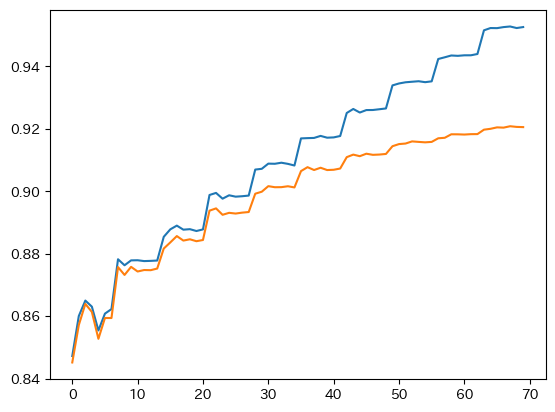

In [108]:
plt.plot(train_score)
plt.plot(test_score)
#plt.xticks([0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9,10])
plt.show()

In [109]:
gcv.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [110]:
pred = gcv.predict_proba(testX)

In [111]:
pred

array([[0.57137057, 0.42862943],
       [0.5546483 , 0.4453517 ],
       [0.9781081 , 0.0218919 ],
       ...,
       [0.98311428, 0.01688572],
       [0.97274987, 0.02725013],
       [0.96242975, 0.03757025]])

In [112]:
pred = pred[:, 1]

In [113]:
sample[1] = pred

In [114]:
sample.to_csv("forest5_bank.csv", index=None, header=None)

In [115]:
parameters3={"n_estimators":list(range(250, 501, 50)),
             "max_depth":list(range(5, 15))}

In [116]:
gcv = GridSearchCV(model4, parameters3, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [250, 300, 350, 400, 450, 500]},
             return_train_score=True, scoring='roc_auc')

In [117]:
gcv.cv_results_

{'mean_fit_time': array([ 3.50607352,  4.26591349,  5.03860321,  5.89888663,  6.61756949,
         7.16086097,  3.99814477,  4.84084325,  5.96089234,  6.81167412,
         7.4311965 ,  8.69878445,  4.80801272,  5.49286151,  6.26174822,
         7.5197576 ,  8.28977933,  8.86667037,  4.97742248,  6.29029517,
         7.09779453,  8.18450031,  9.31323476, 10.37889047,  5.673248  ,
         6.67337565,  7.79185238,  8.71782193,  9.67423525, 10.85818939,
         5.97388258,  7.69129758,  8.83067846,  9.1537796 , 10.12178574,
        11.27989979,  6.04902382,  7.26164255,  8.59663944,  9.81458783,
        11.01373014, 12.2362433 ,  6.51603899,  7.81536803,  9.79346366,
        10.85496273, 11.73426294, 13.07479787,  6.86710501,  8.23466616,
         9.69626284, 11.0712503 , 12.45692601, 13.75631132,  7.28884282,
         8.71193256, 10.17016063, 11.69139819, 13.05076451, 12.47223272]),
 'std_fit_time': array([0.0397215 , 0.08035178, 0.06677571, 0.06116829, 0.02084022,
        0.07567513, 0

In [118]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

In [119]:
train_score

array([0.90823457, 0.9087905 , 0.90877216, 0.90837268, 0.90903289,
       0.90920955, 0.91746501, 0.91767541, 0.91681294, 0.91762   ,
       0.91734566, 0.91782614, 0.92621774, 0.92604835, 0.92581679,
       0.92605769, 0.92638046, 0.92626608, 0.93484008, 0.93486314,
       0.93481593, 0.93502284, 0.93463963, 0.93499421, 0.94348372,
       0.94375655, 0.94357506, 0.9435675 , 0.94346333, 0.94395159,
       0.95238965, 0.95264631, 0.9522968 , 0.95277279, 0.95253006,
       0.95272599, 0.96082796, 0.96099445, 0.96092687, 0.96081578,
       0.96105465, 0.96102276, 0.96896492, 0.96913107, 0.96887601,
       0.96907403, 0.96871271, 0.96906907, 0.97539163, 0.97592431,
       0.97612614, 0.97608225, 0.97629105, 0.97617717, 0.98206861,
       0.98214178, 0.98240873, 0.98240602, 0.98207388, 0.9821901 ])

In [120]:
test_score

array([0.90103314, 0.90123477, 0.90156469, 0.90116919, 0.90159587,
       0.90181852, 0.90690382, 0.90719223, 0.90632018, 0.90743015,
       0.90707006, 0.90760616, 0.91149129, 0.91157745, 0.91178305,
       0.9114938 , 0.91186442, 0.91203535, 0.91536279, 0.915849  ,
       0.91558817, 0.91539147, 0.91509915, 0.91566017, 0.91833216,
       0.91878799, 0.91841972, 0.91835566, 0.91847761, 0.91859273,
       0.92040983, 0.92032543, 0.92047877, 0.92103308, 0.92082843,
       0.92071685, 0.92201315, 0.92219026, 0.92216192, 0.92241014,
       0.92238392, 0.92251072, 0.92346192, 0.92409463, 0.92391481,
       0.92391137, 0.92380621, 0.92366679, 0.92478034, 0.9249093 ,
       0.9246708 , 0.92489206, 0.92489964, 0.92516968, 0.92519839,
       0.92542138, 0.92601908, 0.92642026, 0.92545783, 0.92597254])

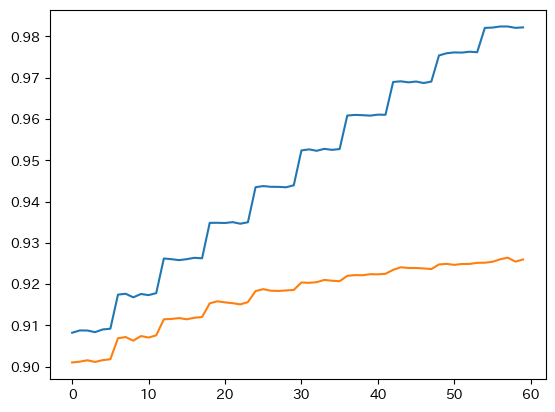

In [121]:
plt.plot(train_score)
plt.plot(test_score)
#plt.xticks([0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9,10])
plt.show()

In [122]:
gcv.best_params_

{'max_depth': 14, 'n_estimators': 400}

In [123]:
pred = gcv.predict_proba(testX)

In [124]:
pred

array([[0.46199615, 0.53800385],
       [0.46664714, 0.53335286],
       [0.98323092, 0.01676908],
       ...,
       [0.99013508, 0.00986492],
       [0.98774151, 0.01225849],
       [0.98114453, 0.01885547]])

In [125]:
pred = pred[:, 1]

In [126]:
sample[1] = pred

In [127]:
sample.to_csv("forest6_bank.csv", index=None, header=None)